# Assignment 3
## Hacettepe University Computer Science & Engineering Department
### Course: BBM 409 Machine Learning Laboratory
### Name: Utku İPEK
### ID: 21627356
### Instructor: Aykut ERDEM
### TA: Burçak ASAL

## Part I: Theory Questions

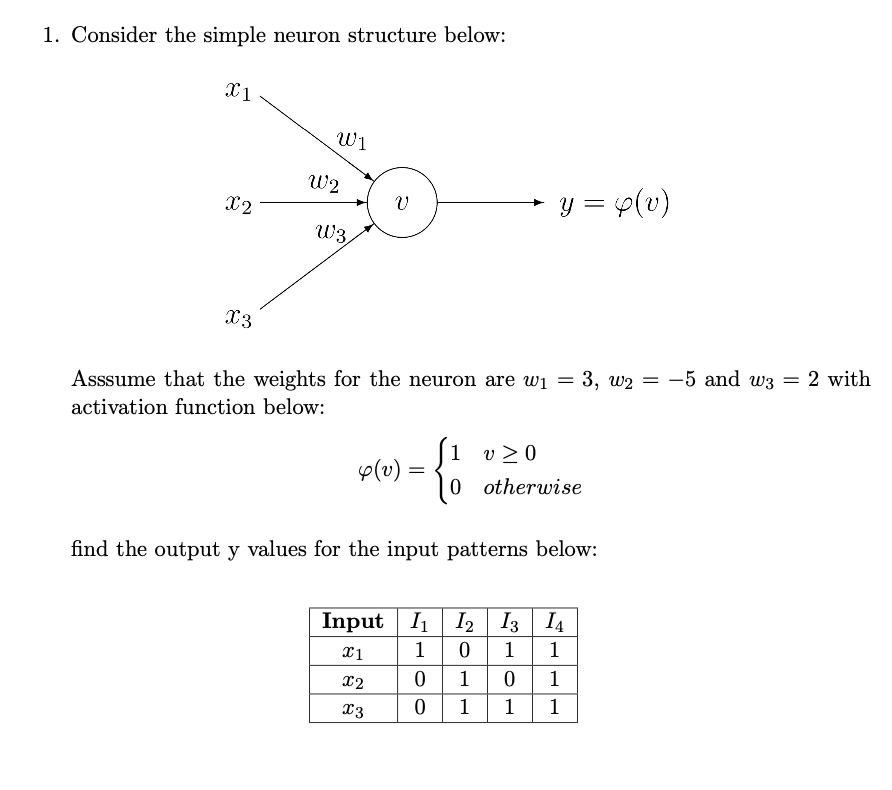
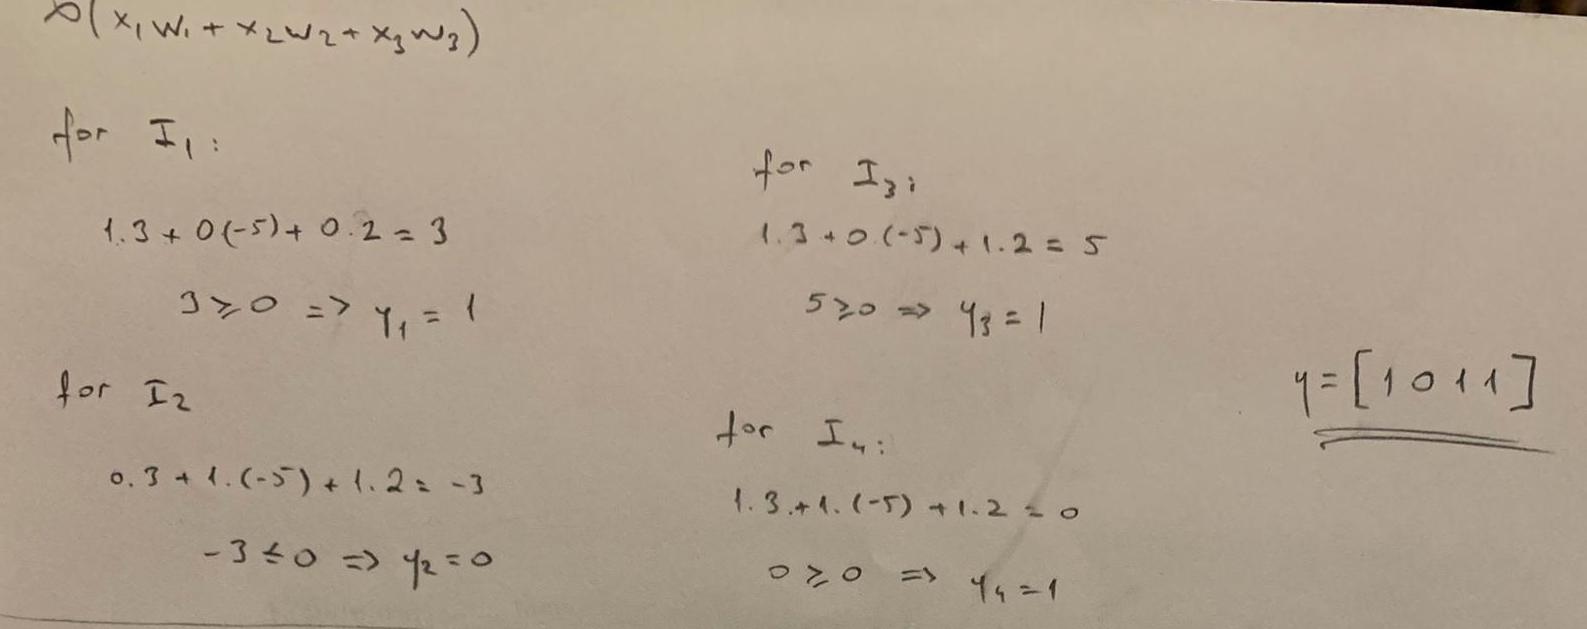

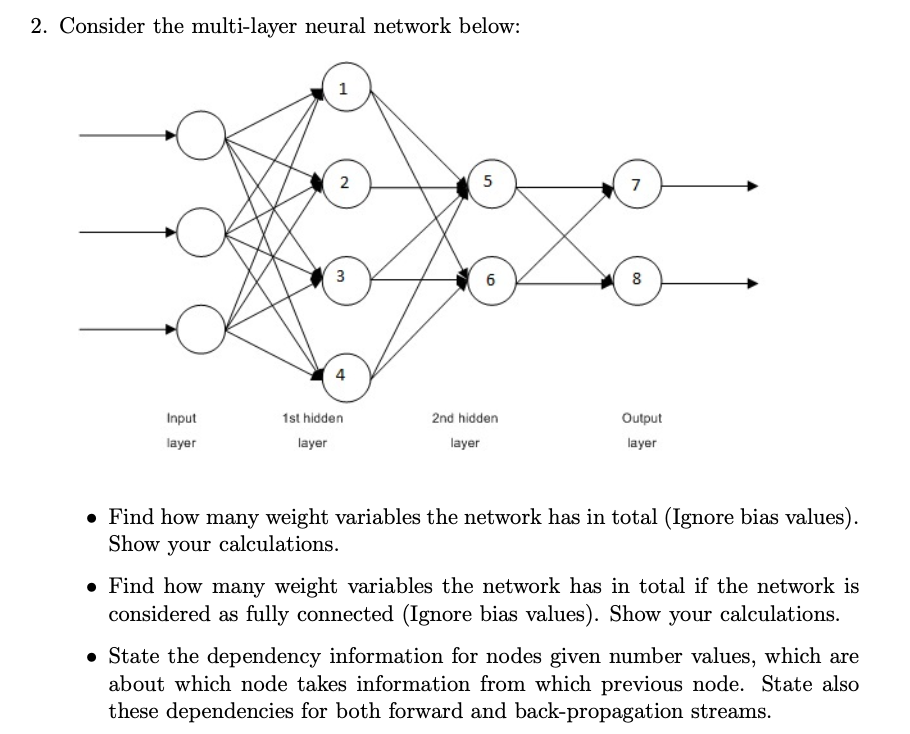
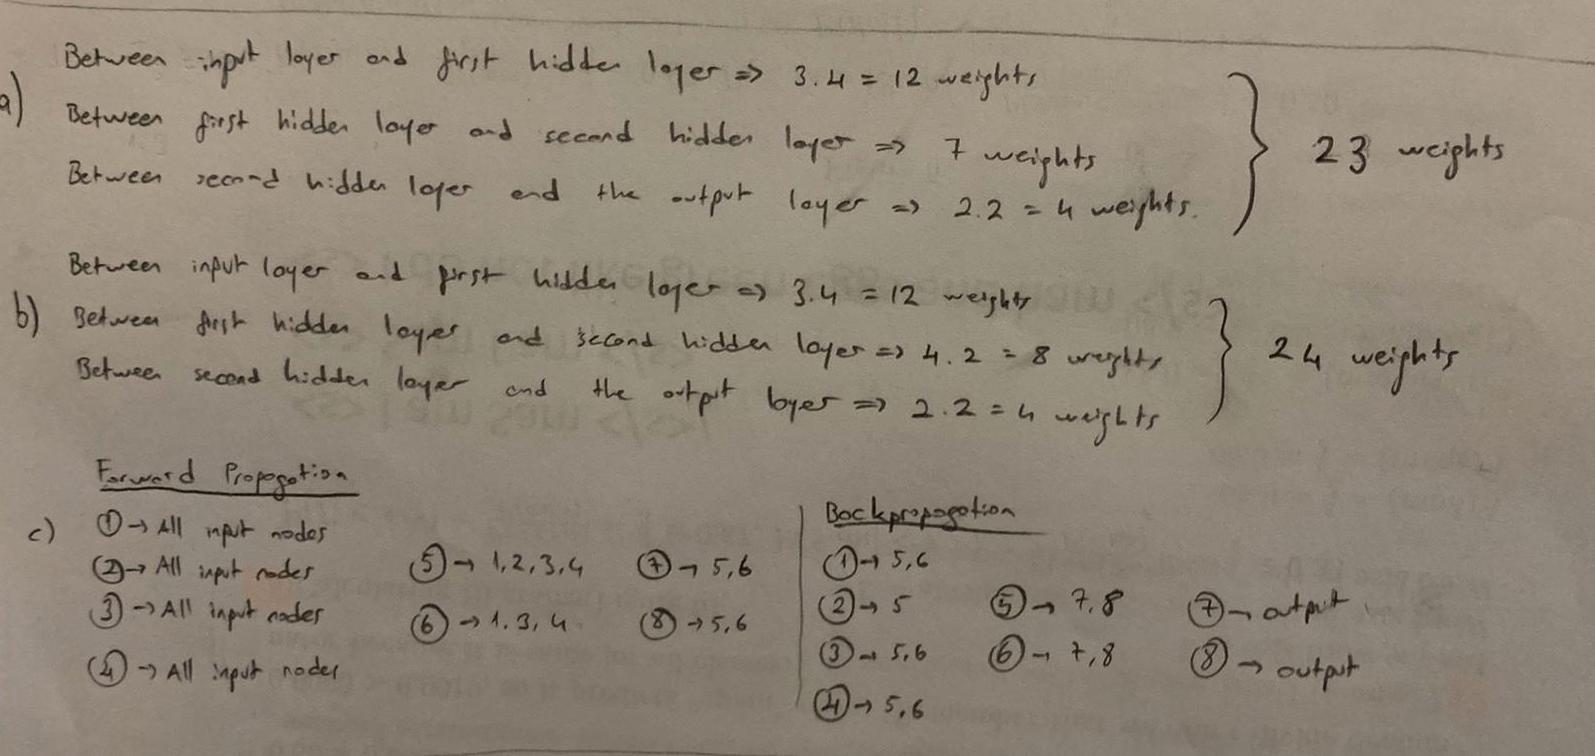

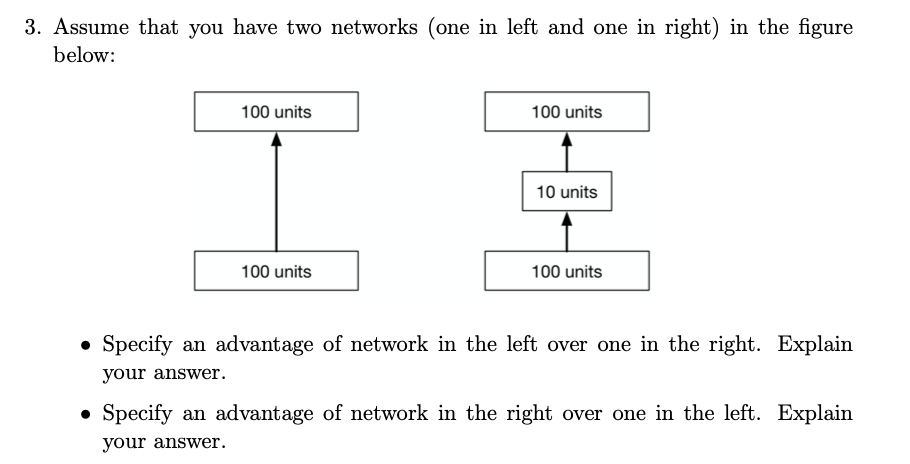
An advantage of network in the left over one in the right: If the problem is simple enough, a network without hidden units can solve it faster. Using hidden units slows the learning process <br>
An advantage of network in the right over one in the left: A network without hidden layers may does not have the provide the right decision boundary for the given dataset. It is not complex enough. A network with hidden layers can learn better. <br>

4. Consider the network structure below:
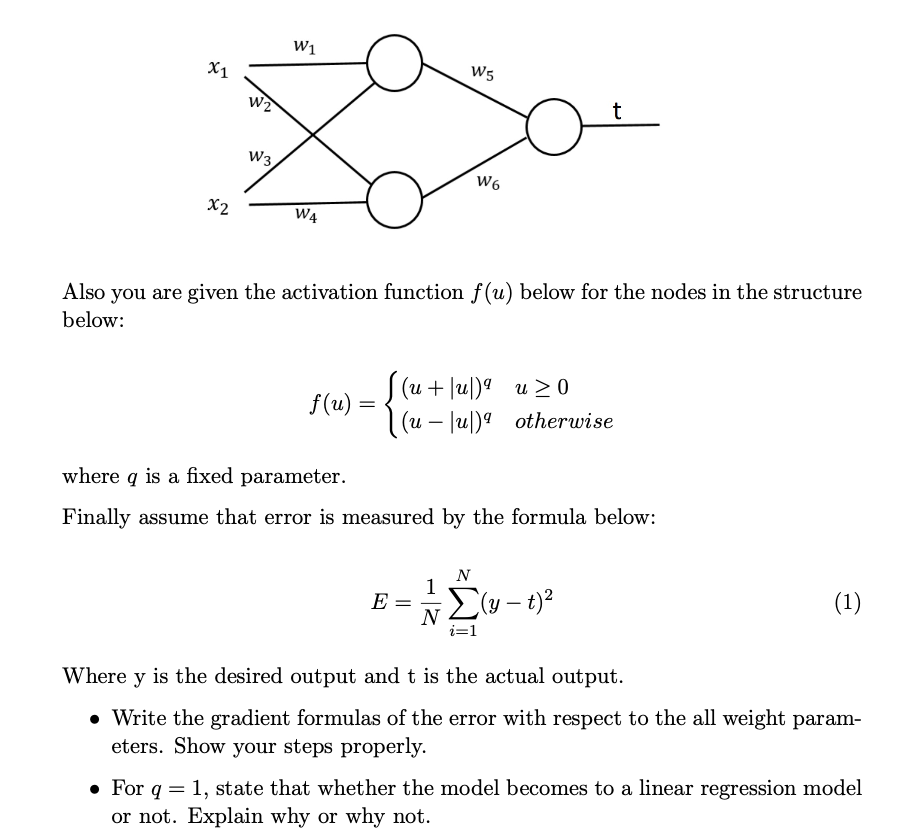
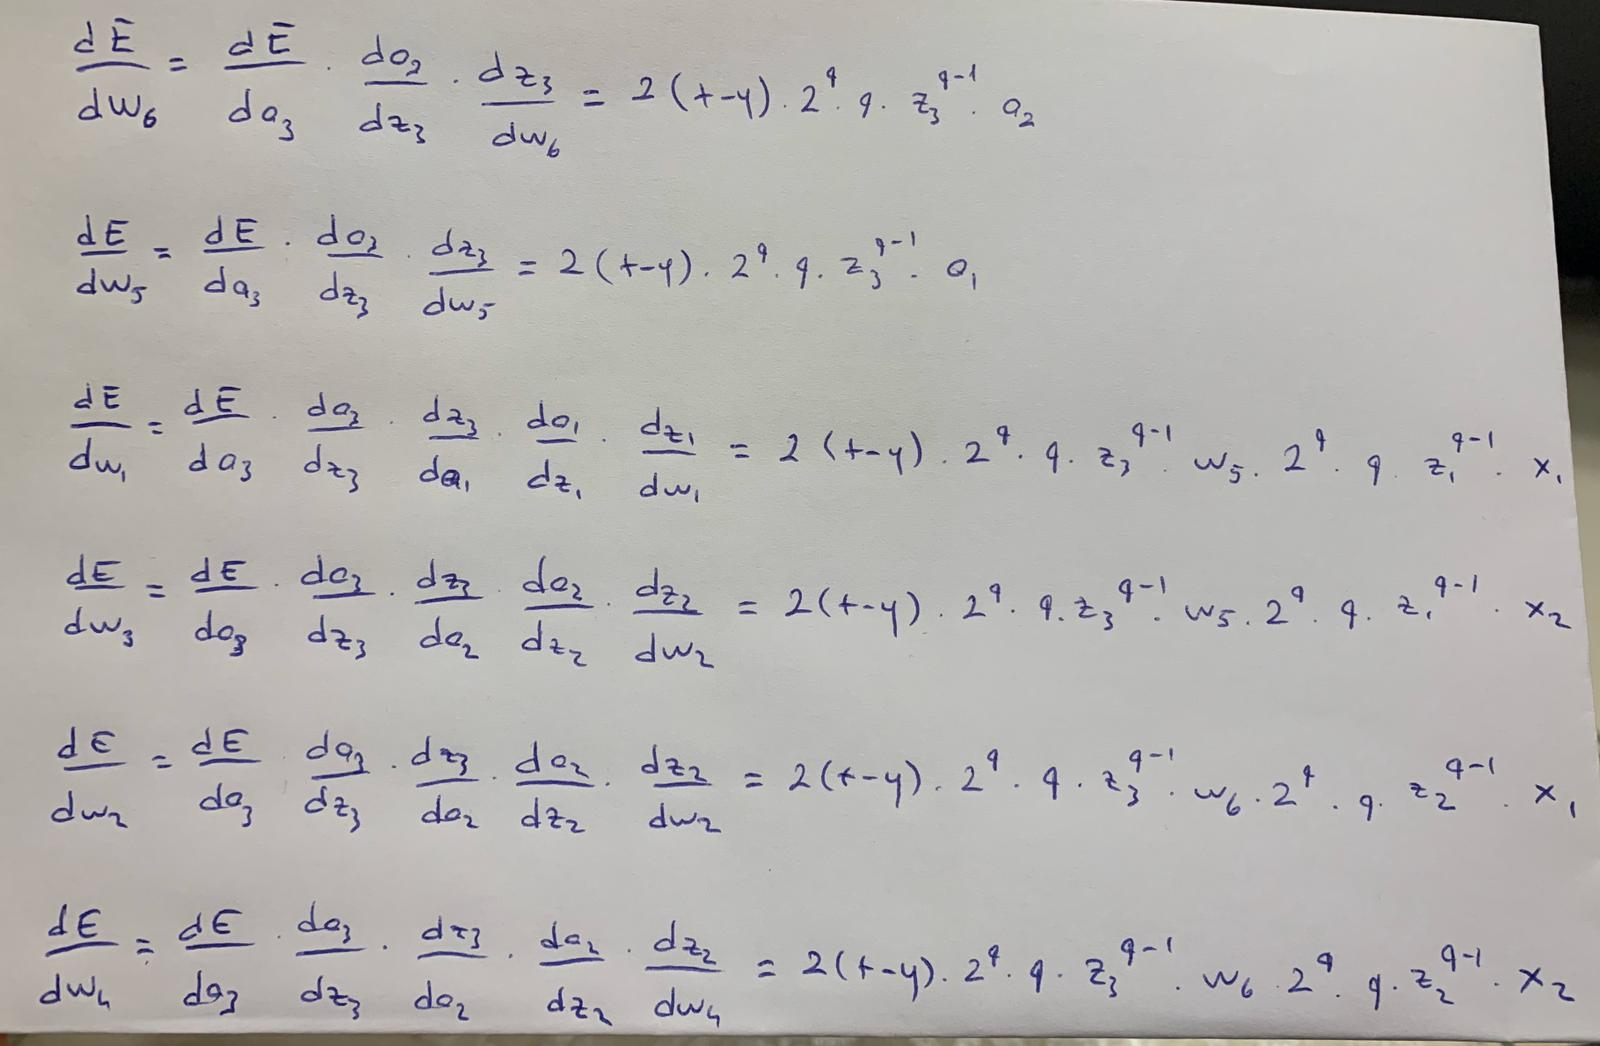

5. Fill the blanks with T(True) or F(False) for the statements below, also explain your reason: <br>
• In every condition, a perceptron network perfectly learns a linearly separable function through a finite number of training steps. (T) <br>
• Single perceptron can compute the XOR function. (F) A single perceptron can only learn linearly seperable patterns and since XOR is not linearly separable, it is false. <br>
• In backpropagation learning, the model should start with a small learning
parameter and slowly increase it while it is in the learning process. (F) Its should not increase, it can be a constant value or it can decrease since it tries to converge the minimum of the loss function. Increasing it does not help to converge to the minimum.<br>

## Part II: Classification of Herbs using Neural Network

### The Problem

In this assignment, we are asked to implement a multi layer neural network and convolutional neural network(using 'pytorch' library) to classify herbs using a dataset which contains 34.225 images of herbarium specimens and corresponding 683 labels. Then, by changing the parameters like activation function, learning rate, number of epochs etc. it is expected to visualize the results and comment on them.

### Libraries
Below, the libraries that will be used in the assignment are imported. These libraries are numpy, for matrix or vector operations, pandas, for reading .csv file and create a dataframe, PIL, to convert images to grayscalea and to resize them, glob, to iterate on all the images in the folder on the computer and time, to calculate time passed on some functions.

In [1]:
#importing necessary libraries
import numpy as np
from numpy import asarray
import pandas as pd
from PIL import Image
import glob
import time
#from google.colab import drive
#drive.mount('/content/drive')
import matplotlib.pyplot as plt

### Arranging The Image Data 

In [2]:
#!unzip "drive/My Drive/neural_network/new_train_resized.zip"

Archive:  drive/My Drive/neural_network/new_train_resized.zip
   creating: new_train_resized/
 extracting: new_train_resized/20037.png  
 extracting: new_train_resized/3975.png  
 extracting: new_train_resized/30224.png  
 extracting: new_train_resized/27758.png  
 extracting: new_train_resized/29775.png  
 extracting: new_train_resized/17843.png  
 extracting: new_train_resized/26446.png  
 extracting: new_train_resized/16585.png  
 extracting: new_train_resized/21329.png  
 extracting: new_train_resized/27980.png  
 extracting: new_train_resized/22620.png  
 extracting: new_train_resized/32433.png  
 extracting: new_train_resized/24251.png  
 extracting: new_train_resized/8820.png  
 extracting: new_train_resized/34042.png  
 extracting: new_train_resized/14392.png  
 extracting: new_train_resized/9280.png  
 extracting: new_train_resized/23258.png  
 extracting: new_train_resized/24537.png  
 extracting: new_train_resized/348.png  
 extracting: new_train_resized/15932.png  
 extract

In [2]:
#read csv file
#dataset = pd.read_csv('drive/My Drive/neural_network/Train_Info.csv')
dataset = pd.read_csv('Train_Info.csv')

In [0]:
#converting images to grayscale and resizing them
start_1 = time.time()
for img_file in glob.glob("train_resized/*.jpg"):
    img_name = img_file.split('/')[1]
    img = Image.open(img_file).convert('LA')
    new_size = (85,128) #width=80, height=120
    img = img.resize(new_size)
    img.save('new_train_resized/' + img_name.split('.')[0] + '.png')
end_1 = time.time()
print((end_1-start_1)/60, "minutes.")

1.7768086830774943 minutes.


Below, I have normalized the pixel values for each image and store them in a (128x85, 1) shaped array, after that I have stored them in a list named all_images to attach it to dataframe. An important note that this part is for my multi layer neural network implementation. For CNN part I have arranged the images again.

In [3]:
#normalizing pixel values for each image, then store them as a list of numpy arrays
start_1 = time.time()
all_images = [None for i in range(len(dataset))] #list of numpy arrays
for img_file in glob.glob("new_train_resized/*.png"):
    img_id = int((img_file.split('/')[1]).split('.')[0])
    image = Image.open(img_file)
    pixels = asarray(image)
    pixels = pixels.astype('float32')
    pixels /= 255.0 #normalizing to the range [0,1]
    values = []
    for i in range(128):
        for j in range(85):
            values.append(pixels[i][j][0])
    values = asarray(values)
    values = values.reshape((values.shape)[0], 1)
    all_images[img_id] = values
end_1 = time.time()
print((end_1 - start_1) / 60, "minutes.")

5.126667749881745 minutes.


In [5]:
dataset['pixels'] = all_images
dataset = dataset[['Id', 'pixels', 'Class',]]

#### An important function
Below, I have implemented a function to return hot encoded class arrays of the images.

In [6]:
def create_output_array(dataset):
    all_arrays = []
    for index in dataset.index.values:
        value = dataset['Class'][index]
        array = np.zeros((683, 1), dtype = int)
        array[value] = 1
        all_arrays.append(array)
    return all_arrays

In [7]:
dataset['class_array'] = create_output_array(dataset)
dataset = dataset[['Id', 'pixels', 'class_array', 'Class']]

In [8]:
dataset

,Id,pixels,class_array,Class
0,0,"[[0.0], [0.023529412], [0.0], [0.03137255], [0...","[[1], [0], [0], [0], [0], [0], [0], [0], [0], ...",0
1,1,"[[0.047058824], [0.0], [0.0], [0.0], [0.007843...","[[1], [0], [0], [0], [0], [0], [0], [0], [0], ...",0
2,2,"[[0.03529412], [0.011764706], [0.0], [0.0], [0...","[[1], [0], [0], [0], [0], [0], [0], [0], [0], ...",0
3,3,"[[0.003921569], [0.003921569], [0.0], [0.0], [...","[[1], [0], [0], [0], [0], [0], [0], [0], [0], ...",0
4,4,"[[0.03137255], [0.0], [0.03529412], [0.0], [0....","[[1], [0], [0], [0], [0], [0], [0], [0], [0], ...",0
5,5,"[[0.0], [0.043137256], [0.007843138], [0.0], [...","[[1], [0], [0], [0], [0], [0], [0], [0], [0], ...",0
6,6,"[[0.003921569], [0.007843138], [0.039215688], ...","[[1], [0], [0], [0], [0], [0], [0], [0], [0], ...",0
7,7,"[[0.0], [0.007843138], [0.011764706], [0.0], [...","[[1], [0], [0], [0], [0], [0], [0], [0], [0], ...",0
8,8,"[[0.015686275], [0.0], [0.02745098], [0.007843...","[[1], [0], [0], [0], [0], [0], [0], [0], [0], ...",0
9,9,"[[0.0627451], [0.0], [0.0], [0.0], [0.03137255...","[[1], [0], [0], [0], [0], [0], [0], [0], [0], ...",0


As seen above, the dataset now contains pixel arrays and hot encoded class arrays for each example. Below, the separation of the dataset into train, validation and test is performed.

In [22]:
train_df, validation_df, test_df = np.split(dataset.sample(frac=1), [int(.8*len(dataset)), int(.9*len(dataset))])

In [23]:
len(train_df), len(validation_df), len(test_df)

(27380, 3422, 3423)

### Multi Layer Neural Network Implementation

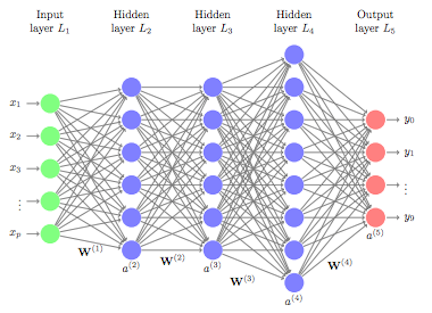

Before I talk about my implementation of the Neural Network class, I want to mention four functions I have implemented. The first function is activation_function() which will be used in forward propogation process of the neural network. It takes two arguments, one of them is z which equals multiplication of 'weights' and 'activations' plus 'biases' , and the other argument is type_string which indciates the type of the activation funtion (sigmoid, ReLu and tanh). <br>
The second function is activation_function_prime() which returns the derivatives of the activation functions. It has the same mechanism in fucntion activation_function(). <br>
The third one is the softmax function that takes as input a vector of K real numbers, and normalizes it into a probability distribution consisting of K probabilities proportional to the exponentials of the input numbers[1]. This function will be applied the output layer of the neural network. <br>
And finally, the fourth function is the create_mini_batches() function. By using the given batch size, it divides the dataframe into mini batches and returns the list of them.

In [11]:
def activation_function(z, type_string):
    if(type_string.__eq__("sigmoid")):
        return (1.0/(1.0+np.exp(-z)))
    elif(type_string.__eq__("ReLu")):
        return np.maximum(0,z)
    elif(type_string.__eq__("tanh")):
        return np.tanh(z)
    else:
        print('error')

In [12]:
def activation_function_prime(z, type_string):
    if(type_string.__eq__("sigmoid")):
        return (activation_function(z, "sigmoid")*(1-activation_function(z, "sigmoid")))
    elif(type_string.__eq__("ReLu")):
        z[z<=0] = 0
        z[z>0] = 1
        return z
    elif(type_string.__eq__("tanh")):
        return (1 - activation_function(z, "tanh")**2)
    else:
        print('error')

In [13]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / np.sum(e_x)
        

In [14]:
def create_mini_batches(dataframe, batch_size):
    mini_batches = [dataframe[i: i + batch_size] for i in range(0, len(train_df), batch_size)]
    return mini_batches

Now that I have introduced the functions above, I can talk about my neural network implementation. In the init() function, I have declared two list 'biases' and 'weights'. They contains bias and weight matrices for the layers. Initially, I have assigned them random numbers between 0 and 1(while assigning them, I have divided random numbers to number of neurons in the input layer for the convenience). This function takes a list as a parameter, and while yhe first element of the list represents the first layer, last element of the list represents the output layer. If there are any elements other than those in the list, they represent the hidden layers. And of course the values of those elements represent the number of neurons in that layer. <br>
To perform the forward propogation, I have defined the forward_propogation() function which takes two parameters, one of them is a single image data and the other is the activation function type. This function returns the activation list which contains the activation vectors (including input layer) and also returns the zs list which contains z vectors to use them in the backpropogation algorithm. <br>
The backpropogation() function takes activations and zs list, y array which is the real output of the data, and the activation function type as arguments and returns the gradients of weights and biases for single train example. <br>
To train the model, I have implemented a function named train_model(). As parameters, it takes the train data, number of epochs, batch size, learning rate, activation function type and finally the validation data. This function, actually performs the stochastic gradient descent algorithm. For every epoch, this function updates the weight and bias values for every mini batch in the mini batches list using another fucntion I have implemented that is named get_updated_weights_and_biases(). The train_model() function also returns two lists of losses (for train data and validation data). <br>
    Finally, to calculate the loss for an example after forward propogation, I have implemented the cross entropy loss function and also imlemented the derivative of the cross entropy function with softmax fucntion.

In [15]:
class NeuralNetwork(object):
    def __init__(self, layers):
        self.layers = layers
        self.num_of_layers = len(layers)
        self.biases = [np.random.randn(y, 1)/self.layers[0] for y in layers[1:]]
        self.weights = [np.random.randn(y,x)/self.layers[0] for x,y in zip(layers[:-1], layers[1:])]
        
    def forward_propogation(self, x, func):
        activations = ([])
        activations.append(x)
        zs = ([])
        z_1 = (np.dot(self.weights[0], x)) + self.biases[0]
        a_1 = activation_function(z_1, func)
        activations.append(a_1)
        zs.append(z_1)
        j=1
        for i in range(1, self.num_of_layers-1):
            z = np.dot(self.weights[i], activations[j]) + self.biases[i]
            a = activation_function(z, func)
            activations.append(a)
            zs.append(z)
            j = j + 1
        return activations, zs
    
    def backpropogation(self, activations, zs, y, func):
        gradient_b = [np.zeros(b.shape) for b in self.biases]
        gradient_w = [np.zeros(w.shape) for w in self.weights]
        
        diff = self.derivative_cross_entropy(activations[-1], y)
        delta = diff * activation_function_prime(zs[-1], func)
        
        gradient_b[-1] = delta
        gradient_w[-1] = np.dot(delta, activations[-2].transpose())
        
        for l in range(2, self.num_of_layers):
            z = zs[-l]
            delta = np.dot(self.weights[-l+1].transpose(), delta) * activation_function_prime(z, func)
            gradient_b[-l] = delta
            gradient_w[-l] = np.dot(delta, activations[-l-1].transpose())     
        return (gradient_b, gradient_w)
    
    def train_model(self, training_data, epochs, batch_size, learning_rate, func, validation_data):
        train_losses_per_epoch = []
        val_losses_per_epoch = []
        num_of_epochs = []
        for i in range(epochs):
            f=[]
            print("Epoch {0} is processing :".format(i+1))
            training_data = training_data.sample(frac=1)
            mini_batches = create_mini_batches(training_data, batch_size)
            for mini_batch in mini_batches:
                mini_batch_loss, u_b, u_w =  self.get_updated_weights_and_biases(mini_batch, learning_rate, func)
                self.weights = u_w
                self.biases = u_b
                f.append(mini_batch_loss)
            true_pred, avg_val_loss = self.test_model(validation_data, func)
            avg_train_loss = sum(f) / len(f)
            num_of_epochs.append(i)
            train_losses_per_epoch.append(avg_train_loss)
            val_losses_per_epoch.append(avg_val_loss)
            print("Test predictions: {0} / {1}".format(true_pred, len(validation_data)))
            print("Avg train loss = {0} , Avg validation loss = {1}".format(avg_train_loss, avg_val_loss))
        return num_of_epochs, train_losses_per_epoch, val_losses_per_epoch
    
    def get_updated_weights_and_biases(self, mini_batch, learning_rate, func):
        total_gradient_b = [np.zeros(b.shape) for b in self.biases]
        total_gradient_w = [np.zeros(w.shape) for w in self.weights]
        losses = []
        for x, y in mini_batch.values:
            activations, zs = self.forward_propogation(x, func)
            loss = self.cross_entropy_loss(activations[-1], y)
            losses.append(loss)
            gradient_b, gradient_w = self.backpropogation(activations, zs, y, func)
            total_gradient_b = [nb+dnb for nb, dnb in zip(total_gradient_b, gradient_b)]
            total_gradient_w = [nw+dnw for nw, dnw in zip(total_gradient_w, gradient_w)]
        avg_loss = sum(losses) / len(losses)
        updated_w = [w - (learning_rate * nw / len(mini_batch)) for w, nw in zip(self.weights, total_gradient_w)]
        updated_b = [b - (learning_rate * nb / len(mini_batch)) for b, nb in zip(self.biases, total_gradient_b)]
        return avg_loss, updated_b, updated_w
    
    def test_model(self, test_data, func):
        tests =[]
        losses = []
        count = 0
        for x, y in (test_data):
            activations, zs = self.forward_propogation(x, func)
            loss = self.cross_entropy_loss(activations[-1], y)
            losses.append(loss)
            out = softmax(activations[-1])
            pred = np.argmax(out)
            real = np.argmax(y)
            if(pred == real): count = count + 1
        avg_loss = sum(losses) / len(losses)
        return count, avg_loss
        
    def cross_entropy_loss(self, output_layer, y):
        pred = softmax(output_layer)
        return np.sum(np.nan_to_num(-y*np.log(pred)-(1-y)*np.log(1-pred)))
    
    def derivative_cross_entropy(self, output_layer, y):
        return(softmax(output_layer) - y)
    

In [20]:
single_layer_network = NeuralNetwork([10880, 0, 683])
epoch_1, train_losses_1, test_losses_1 = single_layer_network.train_model(train_df.iloc[:, 1:3], 30, 16, 3.0, 'tanh', test_df.values[:, 1:3])

Epoch 1 is processing :
Test predictions: 57 / 3423
Avg train loss = 7.177653941200159 , Avg validation loss = 7.140052550771826
Epoch 2 is processing :
Test predictions: 57 / 3423
Avg train loss = 7.1316408499572415 , Avg validation loss = 7.1329377532313245
Epoch 3 is processing :
Test predictions: 57 / 3423
Avg train loss = 7.125555480041412 , Avg validation loss = 7.124888694284973
Epoch 4 is processing :
Test predictions: 57 / 3423
Avg train loss = 7.124020939072379 , Avg validation loss = 7.127310099091472
Epoch 5 is processing :
Test predictions: 57 / 3423
Avg train loss = 7.121441927634755 , Avg validation loss = 7.124091145338205
Epoch 6 is processing :
Test predictions: 57 / 3423
Avg train loss = 7.121530497858093 , Avg validation loss = 7.125275750239857
Epoch 7 is processing :
Test predictions: 57 / 3423
Avg train loss = 7.121223518708591 , Avg validation loss = 7.121160262989043
Epoch 8 is processing :
Test predictions: 57 / 3423
Avg train loss = 7.120696815498513 , Avg va

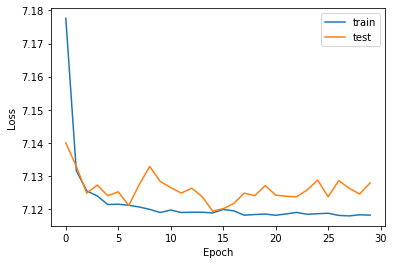

In [21]:
plt.plot(train_losses_1, label= "train")
plt.plot(test_losses_1, label ="test")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [23]:
#accuracy and avg loss for single layer
count , avg_loss = single_layer_network.test_model(test_df.values[:,1:3], "tanh")
(count*100 / len(test_df)), avg_loss

(1.6652059596844873, 7.127986780338255)

In [32]:
one_hidden_layer_network = NeuralNetwork([10880, 30, 683])
epoch_2, train_losses_2, test_losses_2 = one_hidden_layer_network.train_model(train_df.iloc[:, 1:3], 5, 128, 3.0, 'tanh', test_df.values[:, 1:3])

Epoch 1 is processing :
Test predictions: 69 / 3423
Avg train loss = 7.189560056789282 , Avg validation loss = 7.1643771110140095
Epoch 2 is processing :
Test predictions: 69 / 3423
Avg train loss = 7.160806762705024 , Avg validation loss = 7.153956183573666
Epoch 3 is processing :
Test predictions: 69 / 3423
Avg train loss = 7.159222530653892 , Avg validation loss = 7.152606909294497
Epoch 4 is processing :
Test predictions: 69 / 3423
Avg train loss = 7.157426902616565 , Avg validation loss = 7.164795484920201
Epoch 5 is processing :
Test predictions: 69 / 3423
Avg train loss = 7.158347567058227 , Avg validation loss = 7.160085285512769


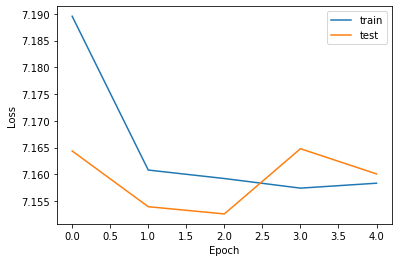

In [33]:
plt.plot(train_losses_2, label= "train")
plt.plot(test_losses_2, label ="test")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [34]:
#accuracy and avg loss for one hidden layer
count_1 , avg_loss_1 = one_hidden_layer_network.test_model(test_df.values[:,1:3], "tanh")
(count_1*100 / len(test_df)), avg_loss_1

(2.0157756354075373, 7.160085285512769)

In [30]:
two_hidden_layer_network = NeuralNetwork([10880, 30, 30, 683])
epoch_3, train_losses_3, test_losses_3 = two_hidden_layer_network.train_model(train_df.iloc[:, 1:3], 5, 256, 3.0, "tanh", test_df.values[:, 1:3])

Epoch 1 is processing :
Test predictions: 69 / 3423
Avg train loss = 7.306811528223642 , Avg validation loss = 7.155026126553594
Epoch 2 is processing :
Test predictions: 69 / 3423
Avg train loss = 7.1451338672848195 , Avg validation loss = 7.135125272599706
Epoch 3 is processing :
Test predictions: 69 / 3423
Avg train loss = 7.133476165508339 , Avg validation loss = 7.13211104807767
Epoch 4 is processing :
Test predictions: 69 / 3423
Avg train loss = 7.128646235645321 , Avg validation loss = 7.1255074800645986
Epoch 5 is processing :
Test predictions: 69 / 3423
Avg train loss = 7.127165086240448 , Avg validation loss = 7.120687585647147


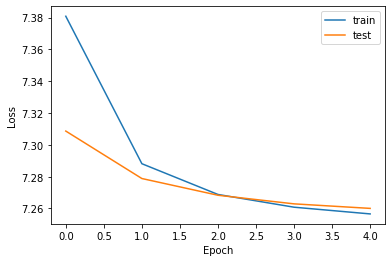

In [26]:
plt.plot(train_losses_3, label= "train")
plt.plot(test_losses_3, label ="test")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [35]:
#accuracy and avg loss for two hidden layer
count_2 , avg_loss_2 = two_hidden_layer_network.test_model(test_df.values[:,1:3], "tanh")
(count_2*100 / len(test_df)), avg_loss_2

(2.0157756354075373, 7.120687585647147)

#### For Single Layer Network
| Number of Epochs | Batch Size | Learning Rate | Activation Function | train_loss | val_loss |
| --- | --- | --- | --- | --- | --- |
| 50 | 64 | 3.0 | sigmoid | 7.2474 | 7.2572 |
| 30 | 32 | 3.0 | sigmoid | 7.2461 | 7.2558 |
| 20 | 32 | 0.3 | sigmoid | 7.3269 | 7.3325 |
| 30 | 16 | 3.0 | ReLu | 7.4500 | 7. 4447|
| 30 | 16 | 3.0 | tanh | 7.1109 | 7.1221 |

As seen above, tanh activation function gives better results compared to sigmoid and ReLu. Choosing the learning rate 3.0 gives better results in plots, the decrease rate of the loss is makes more sense. As the number of epochs decrease, the loss values increases. 

#### For One Hidden Layer Network
| Number of Epochs | Batch Size | Learning Rate | Activation Function | train_loss | val_loss |
| --- | --- | --- | --- | --- | --- |
| 30 | 128 | 3.0 | sigmoid | 7.23 | 7.24 |
| 20 | 64 | 0.3 | sigmoid | 7.28 | 7.29 |
| 20 | 64 | 3.0 | sigmoid | 7.23 | 7.24 |
| 20 | 32 | 3.0 | relu | 7.41 | 7.41 |
| 20 | 128 | 3.0 | tanh | 7.14 | 7.15 |

For one hidden layer network, choosing number of epochs more than 20 or 30 does not make a huge difference on loss values. Again 3.0 as learning rate makes more sense in my implementation. Batch value 64 gives better results than 128 but it takes more time since every update is performed on 64 example rather than 128. And tanh fucntion gives the best loss results on that model like single layer

#### For Two Hidden Layer Network
| Number of Epochs | Batch Size | Learning Rate | Activation Function | train_loss | val_loss |
| --- | --- | --- | --- | --- | --- |
| 15 | 256 | 3.0 | ReLu | 7.26 | 7.25 |
| 15 | 256 | 3.0 | sigmoid | 7.23 | 7.26 |
| 15 | 128 | 3.0 | tanh| 7.10 | 7.11 |
| 15 | 256| 0.3 | ReLu | 7.39 | 7.37 |
| 15 | 128 | 3.0 | ReLu | 7.22 | 7.23 |

As seen above, I did not change the epoch size here because, when I had a larger epoch value before, since the change rate in loss value decreases, it does not make sense to get a higher epoch for this model. Because it can't learn more than that. 256 as a batch size is much but it is faster. 128 batch size learns it better. And although there is not much difference between the loss values, since the hidden layer size is increased, ReLu activation function should works better normally, but sigmoid works better here. Maybe the hidden layer size is not enough. Also, tanh function prints the best results in that model like single layer again. And again, 3.0 as learning rate is better for this implementation too.

As seen above, as an activation function tanh gives the best results on train and validation loss on each three model. And I get an accuracy like %2 on the test data.(Note that the last printed values on the models is not related with tables, before I have sent the assignment, I have executed each three of them to represent a working model.)

### Convolutional Neural Network Implementation Using Pytorch Library

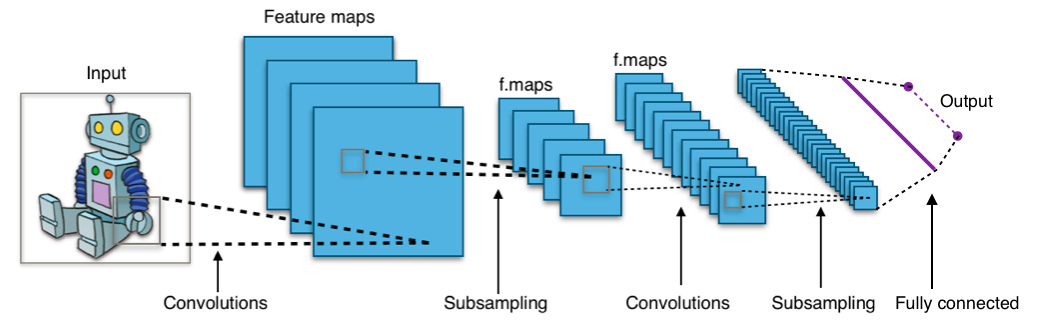
In deep learning, a convolutional neural network (CNN, or ConvNet) is a class of deep neural networks, most commonly applied to analyzing visual imagery.
CNNs are regularized versions of multilayer perceptrons. Multilayer perceptrons usually mean fully connected networks, that is, each neuron in one layer is connected to all neurons in the next layer. The "fully-connectedness" of these networks makes them prone to overfitting data. Typical ways of regularization include adding some form of magnitude measurement of weights to the loss function. CNNs take a different approach towards regularization: they take advantage of the hierarchical pattern in data and assemble more complex patterns using smaller and simpler patterns. Therefore, on the scale of connectedness and complexity, CNNs are on the lower extreme.[3]

#### Libraries

In [0]:
from skimage.io import imread
from skimage.transform import resize

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from tqdm import tqdm

import torch
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD

#### An Important Note
Above, in the "Arranging The Image Data" part of the report, firstly I have tried to get train test and validation example also for CNN but I got errors when I tried to fit the data into the CNN model.  So, I have rearranged the image data for the CNN part of the assignment below.
First, I have shuffled the .csv file and split it into train and test data. Then using skimage library I have re-read the images and created a train list to hold them. An important note here is that, I have resized the images again, because it takes lots of time to complete one epoch in my pc and it went out of memory, and also in colab I got 'CUDA out of memory' error.(I have encountered this situation in CNN only, my multi layer neural network implementation works fine with size (128, 85) both in my pc and colab.

In [4]:
#splitting the dataset for CNN
new_dataset = dataset.sample(frac=1)
train_data = new_dataset.iloc[0:30802, :]
test_data = new_dataset.iloc[30802: , :]

In [0]:
#creation of the training data for CNN
train_img = []
for img_name in tqdm(train_data['Id']):
    image_path = 'new_train_resized_copy/' + str(img_name) + '.png'
    img = imread(image_path, as_gray=True)
    img = resize(img, (img.shape[0] // 3, img.shape[1] // 3), anti_aliasing=True)
    # normalizing the pixel values
    img /= 255.0
    img = img.astype('float32')
    train_img.append(img)


100%|██████████| 30802/30802 [01:48<00:00, 283.19it/s]


In [0]:
# loading test images
test_img = []
for img_name in tqdm(test_data['Id']):
    # defining the image path
    image_path = 'new_train_resized_copy/' + str(img_name) + '.png'
    # reading the image
    img = imread(image_path, as_gray=True)
    img = resize(img, (img.shape[0] // 3, img.shape[1] // 3), anti_aliasing=True)
    # normalizing the pixel values
    img /= 255.0
    # converting the type of pixel to float 32
    img = img.astype('float32')
    # appending the image into the list
    test_img.append(img)

100%|██████████| 3423/3423 [00:10<00:00, 314.24it/s]


In [0]:
test_x = np.array(test_img)
test_y = test_data['Class'].values
test_x.shape

(3423, 42, 28)

In [0]:
test_x = test_x.reshape(3423, 1, 42, 28)
test_x  = torch.from_numpy(test_x)
test_x.shape

torch.Size([3423, 1, 42, 28])

In [0]:
train_x = np.array(train_img)
train_y = train_data['Class'].values
train_x.shape

(30802, 42, 28)

(<matplotlib.axes._subplots.AxesSubplot at 0x1c21868eb8>,
 <matplotlib.image.AxesImage at 0x1c21680c88>)

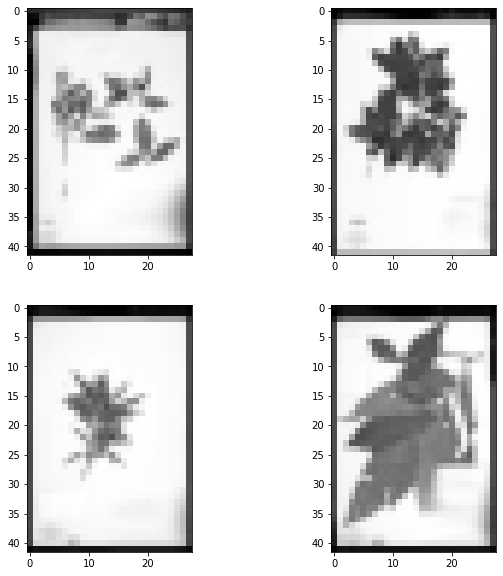

In [0]:
i = 0
plt.figure(figsize=(10,10))
plt.subplot(221), plt.imshow(train_x[i], cmap='gray')
plt.subplot(222), plt.imshow(train_x[i+25], cmap='gray')
plt.subplot(223), plt.imshow(train_x[i+50], cmap='gray')
plt.subplot(224), plt.imshow(train_x[i+75], cmap='gray')

In [0]:
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size = 0.1)
(train_x.shape, train_y.shape), (val_x.shape, val_y.shape)

(((27721, 42, 28), (27721,)), ((3081, 42, 28), (3081,)))

In [0]:
# converting validation images into torch format
train_x = train_x.reshape(27721, 1, 42, 28)
train_x  = torch.from_numpy(train_x)

# converting the target into torch format
train_y = train_y.astype(int);
train_y = torch.from_numpy(train_y)

train_x.shape, train_y.shape

(torch.Size([27721, 1, 42, 28]), torch.Size([27721]))

In [0]:
# converting validation images into torch format
val_x = val_x.reshape(3081, 1, 42, 28)
val_x  = torch.from_numpy(val_x)

# converting the target into torch format
val_y = val_y.astype(int);
val_y = torch.from_numpy(val_y)

# shape of validation data
val_x.shape, val_y.shape

(torch.Size([3081, 1, 42, 28]), torch.Size([3081]))

In [0]:
# Class for CNN
class Net(Module):   
    def __init__(self):
        super(Net, self).__init__()

        self.cnn_layers = Sequential(
            # Defining a 2D convolution layer
            Conv2d(1, 4, kernel_size=3, stride=1, padding=1),
            BatchNorm2d(4),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=3, stride=2),
            # Defining another 2D convolution layer
            Conv2d(4, 4, kernel_size=3, stride=1, padding=1),
            BatchNorm2d(4),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=3, stride=2),
        )

        self.linear_layers = Sequential(
            Linear(216, 683)
        )

    # Forward propogation 
    def forward(self, x):
        x = self.cnn_layers(x)
        x = x.view(x.size(0), -1)
        x = self.linear_layers(x)
        return x

In [0]:
def train(epoch):
    model.train()
    tr_loss = 0
    
    x_train, y_train = Variable(train_x), Variable(train_y)
    
    x_val, y_val = Variable(val_x), Variable(val_y)
    
    if torch.cuda.is_available():
        x_train = x_train.cuda()
        y_train = y_train.cuda()
        x_val = x_val.cuda()
        y_val = y_val.cuda()

    optimizer.zero_grad()
    
    output_train = model(x_train)
    output_val = model(x_val)

    loss_train = criterion(output_train, y_train)
    loss_val = criterion(output_val, y_val)
    train_losses_CNN.append(loss_train)
    val_losses_CNN.append(loss_val)

    loss_train.backward()
    optimizer.step()
    tr_loss = loss_train.item()
    print('Epoch : ',epoch, '\t', ' val loss :', loss_val, '\t', 'loss train:', loss_train)

In [0]:
# model 
model = Net()
# the optimizer
optimizer = Adam(model.parameters(), lr=0.07)
# loss function
criterion = CrossEntropyLoss()
# checking if GPU is available
if torch.cuda.is_available():
    model = model.cuda()
    criterion = criterion.cuda()
    
print(model)

Net(
  (cnn_layers): Sequential(
    (0): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(4, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear_layers): Sequential(
    (0): Linear(in_features=216, out_features=683, bias=True)
  )
)


In [0]:
# empty list to store training losses
train_losses_CNN = []
# empty list to store validation losses
val_losses_CNN = []

In [0]:
# defining the number of epochs
n_epochs = 25
# training the model
for e in range(n_epochs):
    train(e)

Epoch :  0 	  val loss : tensor(6.7488, grad_fn=<NllLossBackward>) 	 loss train: tensor(6.7439, grad_fn=<NllLossBackward>)
Epoch :  1 	  val loss : tensor(11.8712, grad_fn=<NllLossBackward>) 	 loss train: tensor(12.0445, grad_fn=<NllLossBackward>)
Epoch :  2 	  val loss : tensor(13.7318, grad_fn=<NllLossBackward>) 	 loss train: tensor(13.8241, grad_fn=<NllLossBackward>)
Epoch :  3 	  val loss : tensor(11.9750, grad_fn=<NllLossBackward>) 	 loss train: tensor(11.9533, grad_fn=<NllLossBackward>)
Epoch :  4 	  val loss : tensor(9.4491, grad_fn=<NllLossBackward>) 	 loss train: tensor(9.4447, grad_fn=<NllLossBackward>)
Epoch :  5 	  val loss : tensor(7.7007, grad_fn=<NllLossBackward>) 	 loss train: tensor(7.6914, grad_fn=<NllLossBackward>)
Epoch :  6 	  val loss : tensor(6.9492, grad_fn=<NllLossBackward>) 	 loss train: tensor(6.9350, grad_fn=<NllLossBackward>)
Epoch :  7 	  val loss : tensor(6.5784, grad_fn=<NllLossBackward>) 	 loss train: tensor(6.5702, grad_fn=<NllLossBackward>)
Epoch :  8

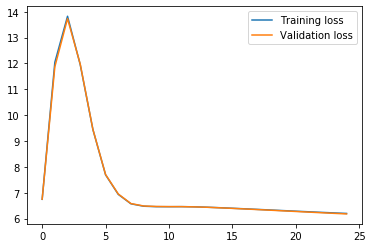

In [0]:
plt.plot(train_losses_CNN, label='Training loss')
plt.plot(val_losses_CNN , label='Validation loss')
plt.plot()
plt.legend()
plt.show()

In [0]:
# prediction for training set
with torch.no_grad():
    output = model(train_x)
    
softmax = torch.exp(output).cpu()
prob = list(softmax.numpy())
predictions = np.argmax(prob, axis=1)

# accuracy on training set
accuracy_score(train_y, predictions)

0.006890083330327189

In [0]:
# prediction for validation set
with torch.no_grad():
    output = model(val_x)

softmax = torch.exp(output).cpu()
prob = list(softmax.numpy())
predictions = np.argmax(prob, axis=1)

# accuracy on validation set
accuracy_score(val_y, predictions)

0.009087958455047063

In [0]:
# generating predictions for test set
with torch.no_grad():
    output = model(test_x)

softmax = torch.exp(output).cpu()
prob = list(softmax.numpy())
predictions = np.argmax(prob, axis=1)

#accuracy on test set
accuracy_score(test_y, predictions)

0.006134969325153374

#### Plots on Train Loss for CNN
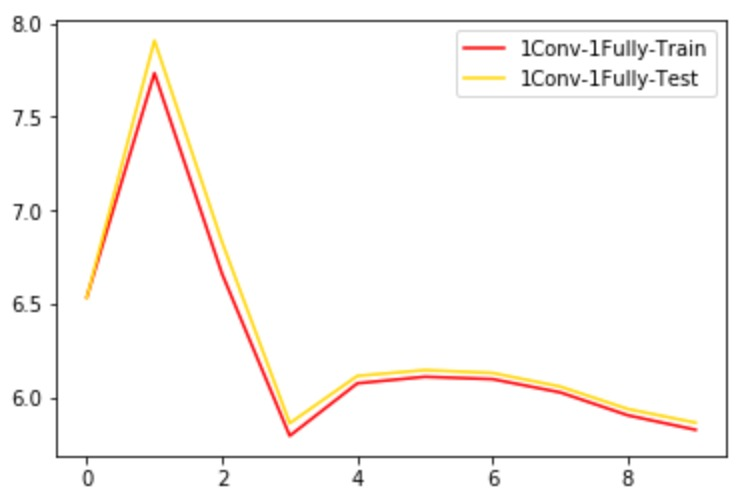<br>
I got the above plot for 1 conv2d and 1 fully connected layer on train loss.
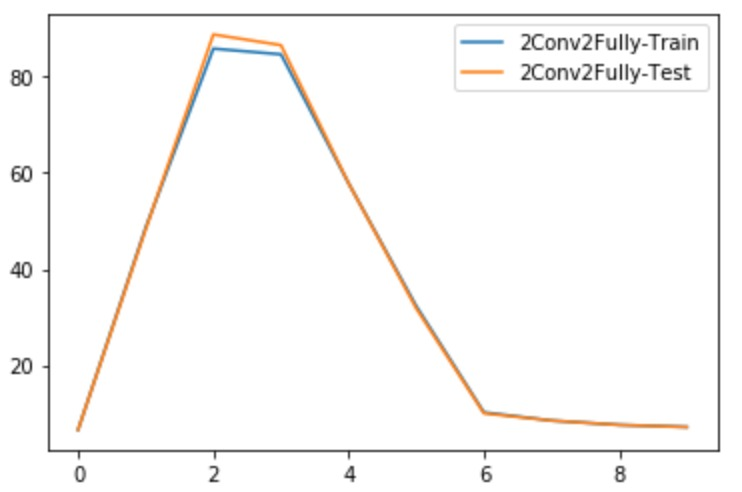<br>
I got the above plot for 2 conv2d and 2 fully connected layer on train loss.

## Conclusion
Although CNN is much more convenient to classify images compared to multi layer neural networks since it is preserve the spatial structure of the image, in this assignment there is not much difference between my CNN and multi layer neural network implementation. Because, in order to get the results faster, I have resized the images for the CNN part again. So, the CNN works properly but it gives poor results. And the multi layer neural network implementation 
also works properly but, since there are 683 classes to classify, it also gives poor results. <br>
Also, about the early stopping part, in my multi layer network implementation, since the change rate of the train loss and the validation loss in my multi layer network is too slow after an epoch number like for example 25, and after that the loss was still above 7, to show an early stop point does not make sense.


## References

[1] https://bradleyboehmke.github.io/HOML/deep-learning.html <br>
[2] https://en.wikipedia.org/wiki/Softmax_function <br>
[3] https://en.wikipedia.org/wiki/Convolutional_neural_network